In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import plot_pred_v_truth

In [32]:
df = pd.read_csv("pulse_data/pulse_response_T5(in).csv",header = None).to_numpy()

time = df[:, 0]
input_signal = df[:, 1]
output_signal = df[:, 2]

start = np.where(input_signal > 0)[0][0]
time = time[start:]
input_signal = input_signal[start:]
output_signal = output_signal[start:]
N = time.shape[0]
start_time = time[start]

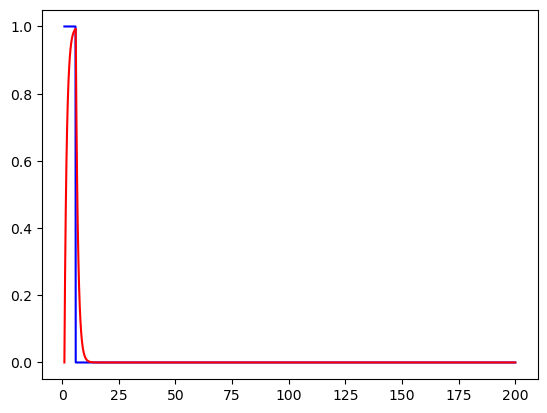

In [33]:
plt.plot(time, input_signal, label='Input Signal', color='blue')
plt.plot(time, output_signal, label='Output Signal', color='red')

In [34]:
R = np.zeros((N,N))

for i in range(N):
    for k in range(i+1):
        R[i, k] = input_signal[i-k]


In [35]:
R

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [36]:
d = np.linalg.solve(R, output_signal)

In [37]:
K = np.zeros((N,N))

for i in range(N):
    for k in range(i+1):
        K[i, k] = d[i-k]


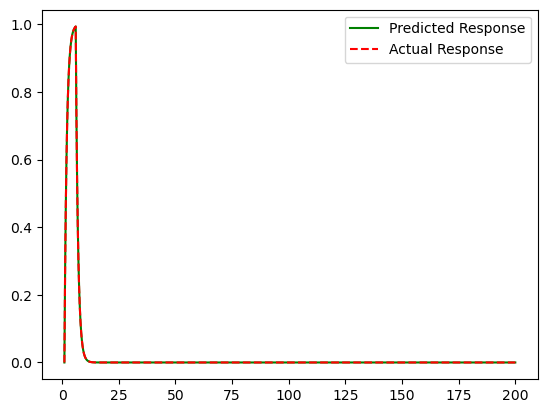

In [38]:
pred_response = K @ input_signal.reshape(-1,1)
plt.plot(time, pred_response, label='Predicted Response', color='green')
plt.plot(time, output_signal, label='Actual Response', color='red', linestyle='dashed')
plt.legend()

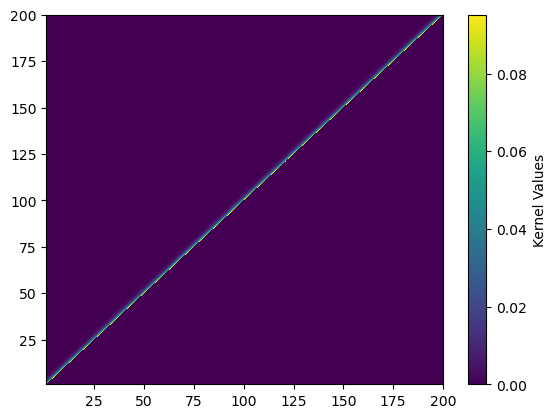

In [39]:
X,Y = np.meshgrid(time, time)
plt.pcolormesh(X, Y, K, shading='auto')
plt.colorbar(label='Kernel Values')


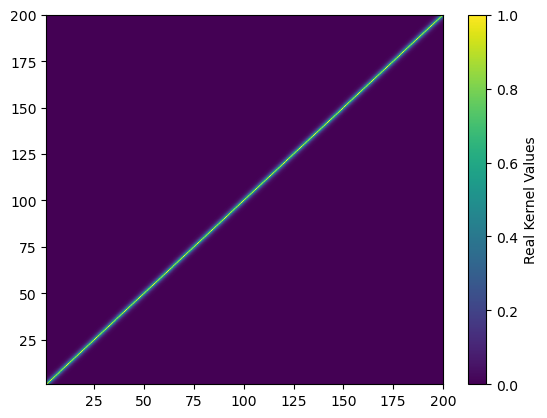

In [40]:
def real_kernel(t,tau):
    return np.exp(-np.abs(tau-t))

real = real_kernel(X,Y)
plt.pcolormesh(X, Y, real, shading='auto', cmap='viridis')
plt.colorbar(label='Real Kernel Values')

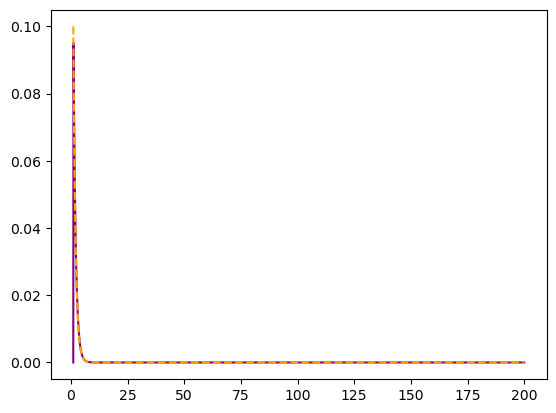

In [41]:
impulse = np.zeros((N, 1))
impulse[0] = 1

impulse_response = K @ impulse

dt = time[1] - time[0]
plt.plot(time, impulse_response, label='Impulse Response', color='purple')
plt.plot(time, np.exp(-time+1)*dt, label='Exponential Decay', color='orange', linestyle='dashed')

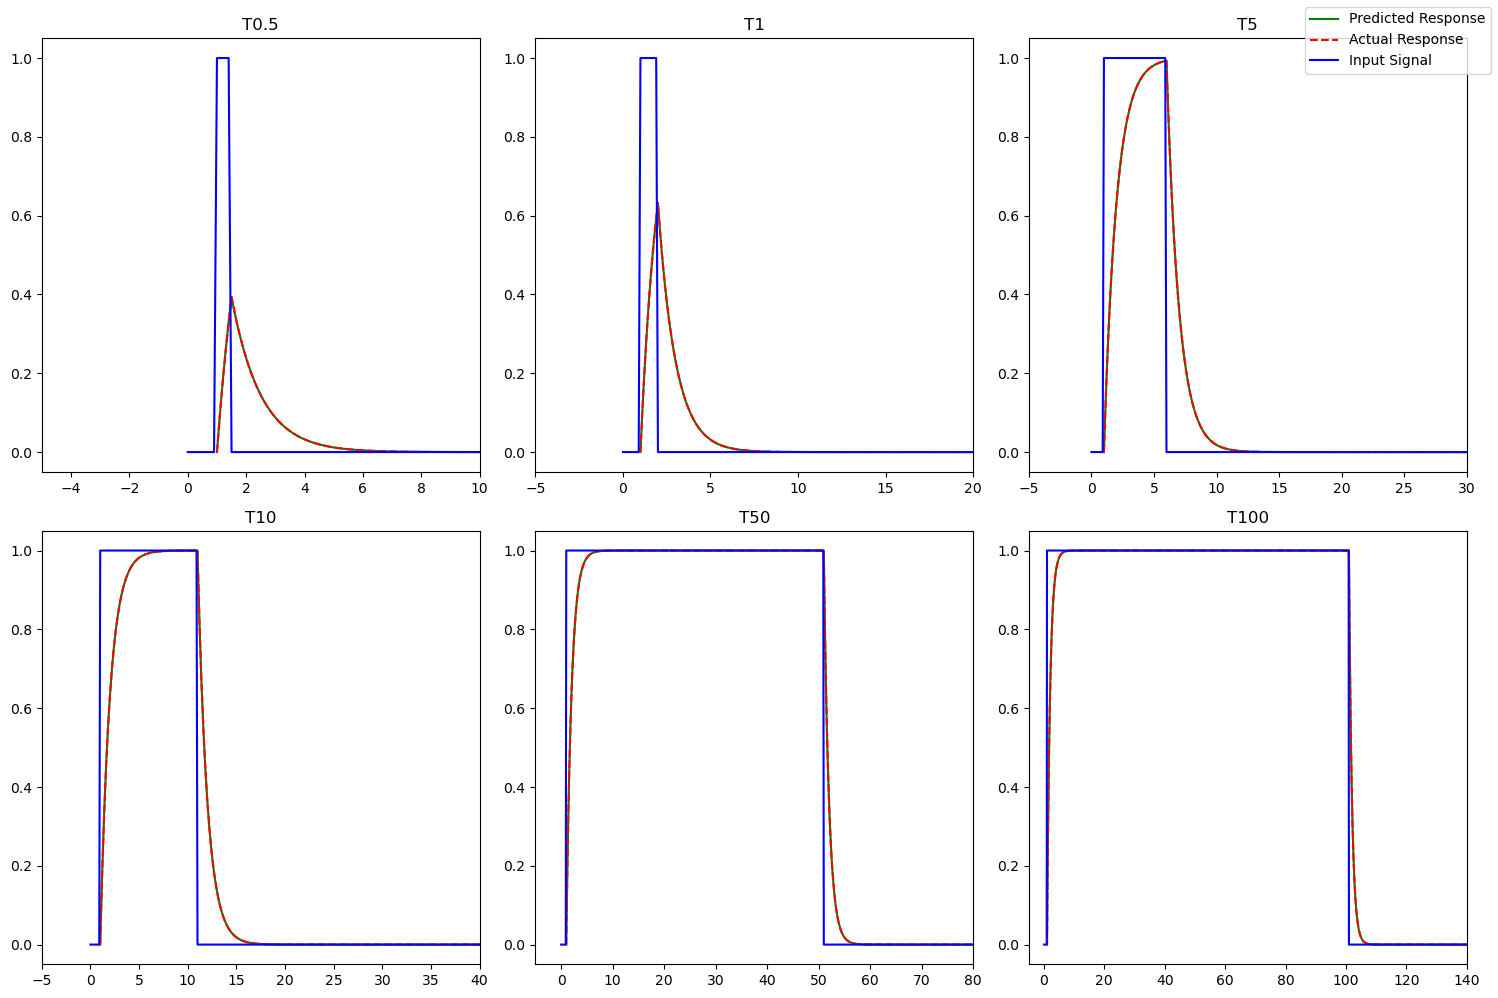

In [42]:
df05 = pd.read_csv("pulse_data/pulse_response_T0.csv", header=None).to_numpy()
df1 = pd.read_csv("pulse_data/pulse_response_T1(in).csv", header=None).to_numpy()
df10 = pd.read_csv("pulse_data/pulse_response_T10(in).csv", header=None).to_numpy()
df50 = pd.read_csv("pulse_data/pulse_response_T50(in).csv", header=None).to_numpy()
df100 = pd.read_csv("pulse_data/pulse_response_T100(in).csv", header=None).to_numpy()

dfs = [df05, df1, df, df10, df50, df100]
signal_names = ['T0.5', 'T1','T5', 'T10', 'T50', 'T100']
limits =  [10, 20, 30, 40, 80, 140]
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()

for i, df_ in enumerate(dfs):
    time_ = df_[:,0]
    input_signal_ = df_[:,1]
    output_signal_ = df_[:,2]

    pred = K @ input_signal_.reshape(-1, 1)[start:,:]

    # Plot signals
    axes[i].plot(time_[start:], pred, label='Predicted Response', color='green')
    axes[i].plot(time_[start:], output_signal_[start:], label='Actual Response', color='red', linestyle='dashed')
    axes[i].plot(time_, input_signal_, label='Input Signal', color='blue')

    axes[i].set_title(signal_names[i])
    axes[i].set_xlim(-5, limits[i])

# Remove individual legends
# Create a single shared legend using handles and labels from the last axis
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


c:\Users\mathi\anaconda3\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mathi\anaconda3\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


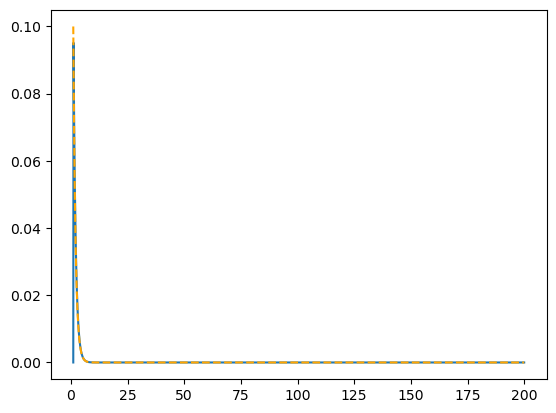

In [43]:
g_hat = np.fft.fft(output_signal)
f_hat = np.fft.fft(input_signal)
H_hat = g_hat / f_hat
H = np.fft.ifft(H_hat)

plt.plot(time, H)
plt.plot(time, np.exp(-time+1)*dt, label='Exponential Decay', color='orange', linestyle='dashed')

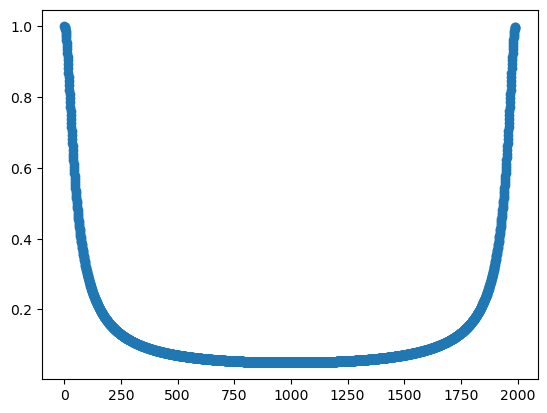

In [44]:
plt.scatter( [i for i in range(len(H_hat))],np.abs(H_hat))

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define interactive function
def plot_with_frequencies(signals_kept):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Copy H_hat and zero out frequencies beyond signals_kept
    H_hat_ = H_hat.copy()
    H_hat_[signals_kept:2000-signals_kept] = 0

    for i, df_ in enumerate(dfs):
        time_ = df_[:, 0]
        input_signal_ = df_[:, 1]
        output_signal_ = df_[:, 2]

        input_signal_hat = np.fft.fft(input_signal_[start:])

        pred_hat = H_hat_ * input_signal_hat
        pred = np.fft.ifft(pred_hat)

        axes[i].plot(time_[start:], pred.real, label='Predicted Response', color='green')
        axes[i].plot(time_[start:], output_signal_[start:], label='Actual Response', color='red', linestyle='dashed')
        axes[i].plot(time_, input_signal_, label='Input Signal', color='blue')

        axes[i].set_title(signal_names[i])
        axes[i].set_xlim(-5, limits[i])

    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.tight_layout()
    plt.show()

# Define slider widget for number of frequencies kept
slider = IntSlider(min=1, max=800, step=1, value=800, description='Frequencies Kept')

# Launch interactive plot
interact(plot_with_frequencies, signals_kept=slider)


interactive(children=(IntSlider(value=800, description='Frequencies Kept', max=800, min=1), Output()), _dom_cl…

<function __main__.plot_with_frequencies(signals_kept)>

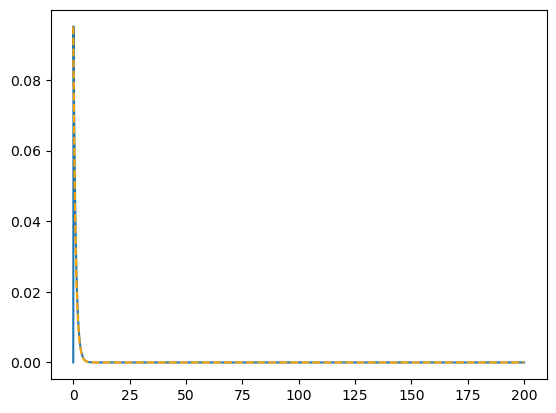

In [29]:
impulse = np.zeros(len(time))
impulse[0] = 1

impulse_response = np.fft.ifft(H_hat * np.fft.fft(impulse))
plt.plot(time, impulse_response)
plt.plot(time, np.exp(-time+1)*0.035, label='Exponential Decay', color='orange', linestyle='dashed')